$\textbf{PROGRAMMING ASSIGNMENT}$
---

# Instructions:

1. Choose a data from https://archive.ics.uci.edu
2. Perform regression analysis on your chosen dataset

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [43]:
from ucimlrepo import fetch_ucirepo
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [44]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 
  
# data (as pandas dataframes) 
X = communities_and_crime.data.features 
y = communities_and_crime.data.targets 
  
# variable information 
print(communities_and_crime.variables) 


{'uci_id': 183, 'name': 'Communities and Crime', 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime', 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv', 'abstract': 'Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1994, 'num_features': 127, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Occupation'], 'target_col': ['ViolentCrimesPerPop'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2002, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C53W3X', 'creators': ['Michael Redmond'], 'intro_paper': {'title': 'A data-driven software tool for enabling cooperative information sharing among police departmen

In [46]:
X.loc[:, 'racepctblack'] = X['racepctblack'].replace('?', np.nan).astype(float)
X_numeric = X.select_dtypes(include='number')
X_numeric['racepctblack'].fillna(X_numeric['racepctblack'].median(), inplace=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=634)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.01979895160752167
R-squared: 0.6491494921071139


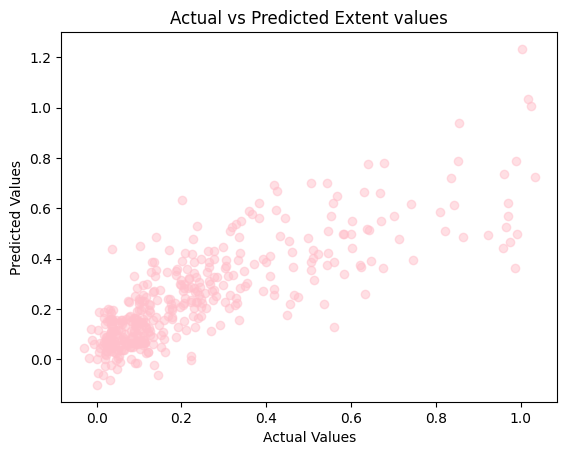

In [48]:
y_test_jittered = y_test + np.random.normal(0, 0.02, size=y_test.shape)
y_pred_jittered = y_pred + np.random.normal(0, 0.02, size=y_pred.shape)

# Creating the scatter plot with transparency
plt.scatter(y_test_jittered, y_pred_jittered, color='pink', alpha=0.5)
plt.title('Actual vs Predicted Extent values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()